Simulated E[tau]:    0.0748892 
Theoretical E[tau]:  0.07026175 
Simulated P(profit): 0.6298 
Theoretical P(profit]: 0.6309298 


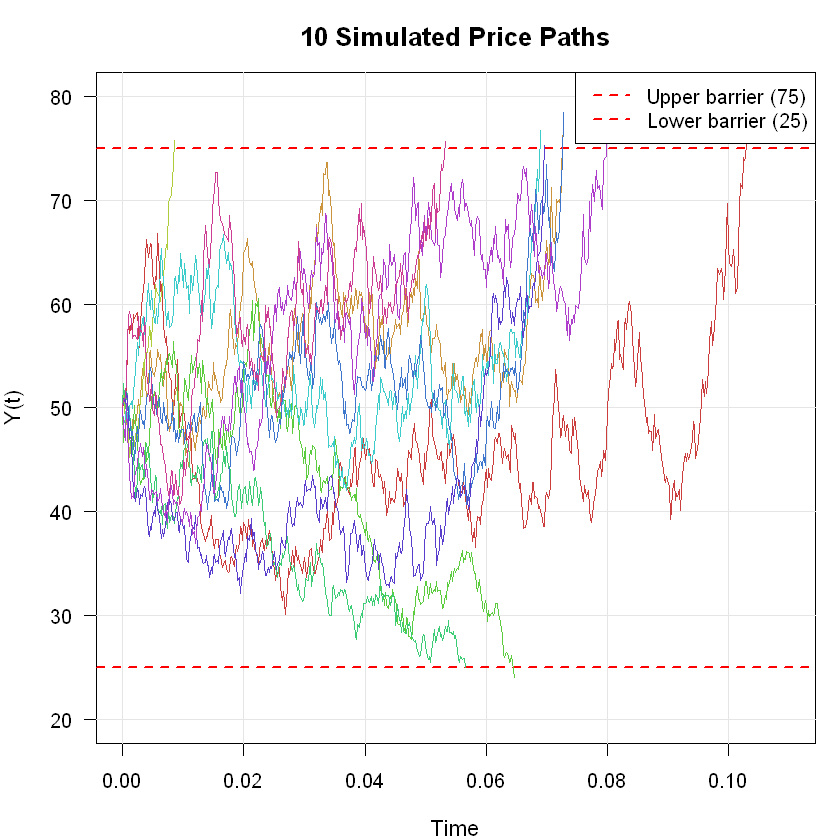

In [28]:
#param
sigma <- 2                 
Y0    <- 50
lower <- 25
upper <- 75
k <- 10 #for plotting paths

a <- log(upper / Y0)       # +a
b <- log(Y0 / lower)       # -b

dt   <- 0.0002
Tmax <- 1           
n    <- ceiling(Tmax / dt) 

# Monte Carlo
set.seed(1)
n_sim <- 10000
taus   <- numeric(n_sim)
hit_up <- logical(n_sim)

for (s in 1:n_sim) {
  z  <- rnorm(n)                            # i.i.d. N(0,1)
  dX <- sigma * sqrt(dt) * z                # increments
  X  <- c(0, cumsum(dX))                    # Brownian path with scale sigma

  idx_up   <- which(X >=  a)[1]
  idx_down <- which(X <= -b)[1]
  idx      <- suppressWarnings(min(c(idx_up, idx_down), na.rm = TRUE))
  if (!is.finite(idx)) next     

  taus[s]   <- (idx - 1) * dt #hitting time
  hit_up[s] <- (!is.na(idx_up) && idx == idx_up)
}

#drop those that didnt hit within Tmax
ok <- taus > 0
E_tau_sim <- mean(taus[ok])
p_profit  <- mean(hit_up[ok])

E_tau_theory <- (a * b) / sigma^2
p_profit_theory <- log(2) / (log(1.5) + log(2)) 

cat("Simulated E[tau]:   ", E_tau_sim,      "\n")
cat("Theoretical E[tau]: ", E_tau_theory,   "\n")
cat("Simulated P(profit):", p_profit,       "\n")
cat("Theoretical P(profit]:", p_profit_theory, "\n")

x_end <- min(max(taus[ok], na.rm = TRUE), 0.11)
if (!is.finite(x_end)) x_end <- Tmax

# Better plot settings
par(bg = "white", mar = c(4, 4, 3, 1))
plot(NULL, xlim = c(0, x_end), ylim = c(20, 80),
     xlab = "Time", ylab = "Y(t)", 
     main = "10 Simulated Price Paths",
     las = 1, cex.main = 1.3, cex.lab = 1.1)

# Add grid for better readability
grid(col = "gray90", lty = 1)

# Barriers
abline(h = c(lower, upper), lty = 2, col = "red", lwd = 2)

#cool colors
colors <- rainbow(k, s = 0.7, v = 0.8)

for (i in 1:k) {
  z <- rnorm(n)
  dX <- sigma * sqrt(dt) * z
  X <- c(0, cumsum(dX))
  Y <- Y0 * exp(X)
  
  idx_up   <- which(Y >= upper)[1]
  idx_down <- which(Y <= lower)[1]
  idx <- suppressWarnings(min(c(idx_up, idx_down), na.rm = TRUE))
  if (!is.finite(idx)) idx <- length(Y)
  
  lines(seq(0, by = dt, length.out = idx), Y[1:idx], 
        col = colors[i], lwd = 1.5)
}

# Add legend for barriers
legend("topright", legend = c("Upper barrier (75)", "Lower barrier (25)"),
       col = "red", lty = 2, lwd = 2, bg = "white")


In [30]:
#param
sigma <- 2                 
Y0    <- 50
lower <- 25
upper <- 75

a <- log(upper / Y0)       # +a
b <- log(Y0 / lower)       # -b

dt   <- 0.0002
Tmax <- 1.0            
n    <- ceiling(Tmax / dt) 

set.seed(42)
n_sim <- 10000
taus_profit <- numeric(n_sim)
count_profit <- 0

for (s in 1:n_sim) {
  z  <- rnorm(n)
  dX <- sigma * sqrt(dt) * z
  X  <- c(0, cumsum(dX))
  
  idx_up   <- which(X >=  a)[1]
  idx_down <- which(X <= -b)[1]
  
  # Only keep paths where upper barrier hit first
  if (!is.na(idx_up) && (is.na(idx_down) || idx_up < idx_down)) {
    count_profit <- count_profit + 1
    taus_profit[count_profit] <- (idx_up - 1) * dt
  }
}

taus_profit <- taus_profit[1:count_profit]
E_tau_profit_sim <- mean(taus_profit)

cat("=== SIMULATION APPROACH ===\n")
cat("Number of paths hitting upper barrier first:", count_profit, "\n")
cat("E[tau | hit upper first] (simulation):", E_tau_profit_sim, "\n\n")

p_upper <- b / (a + b)

t_grid <- sort(taus_profit)
S_empirical <- seq(length(t_grid), 1) / length(t_grid)

# Numerical integration using trapezoidal rule
E_tau_profit_integrate <- sum(diff(c(0, t_grid)) * c(1, S_empirical[-length(S_empirical)]))

cat("=== NUMERICAL INTEGRATION APPROACH ===\n")
cat("E[tau | hit upper first] (integration):", E_tau_profit_integrate, "\n\n")


=== SIMULATION APPROACH ===
Number of paths hitting upper barrier first: 6246 
E[tau | hit upper first] (simulation): 0.06499914 

=== NUMERICAL INTEGRATION APPROACH ===
E[tau | hit upper first] (integration): 0.06510202 

